<a href="https://colab.research.google.com/github/Prashows/AI_LAB_Prashows_Amatya/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   Age  Salary Class      Distance  Rank
8   50   59182     B    818.137519     1
5   23   61657     B   1657.043451     2
2   48   62492     B   2492.033908     3
7   32   52597     A   7403.000608     4
1   20   79232     A  19232.005850     5
0   33   38923     A  21077.000095     6
9   49   81904     B  21904.004474     7
3   20   36869     A  23131.004864     8
6   38   35029     A  24971.000180     9
4   43   97899     B  37899.000844    10

Predicted class for new point (35, 60000): B


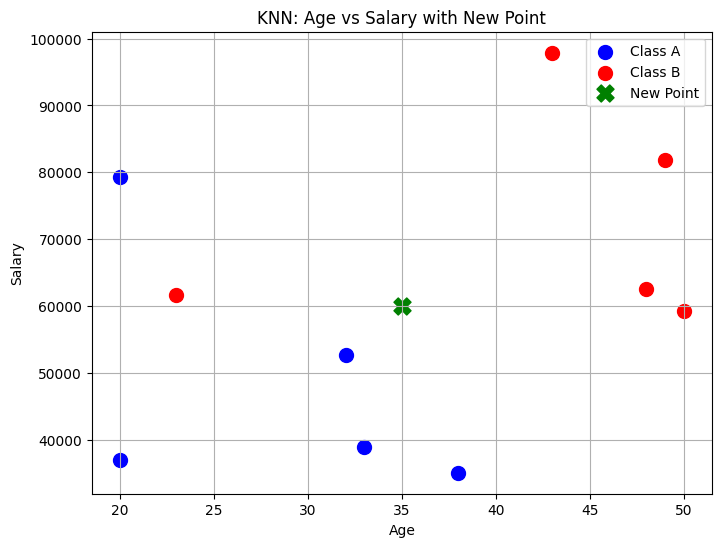

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Dataset
data = {
    'Age': [33, 20, 48, 20, 43, 23, 38, 32, 50, 49],
    'Salary': [38923, 79232, 62492, 36869, 97899, 61657, 35029, 52597, 59182, 81904],
    'Class': ['A', 'A', 'B', 'A', 'B', 'B', 'A', 'A', 'B', 'B']
}
df = pd.DataFrame(data)

# Step 2: New point
new_point = {'Age': 35, 'Salary': 60000}

# Step 3: Euclidean distance calculation
df['Distance'] = np.sqrt((df['Age'] - new_point['Age'])**2 + (df['Salary'] - new_point['Salary'])**2)

# Step 4: Ranking by distance (sorted index)
df['Rank'] = df['Distance'].rank(method='first').astype(int)  # 1 is closest

# Step 5: Sort dataframe by rank (optional, for printing)
df_sorted = df.sort_values('Rank')

# Display sorted points and total distances
print(df_sorted[['Age', 'Salary', 'Class', 'Distance', 'Rank']])

# Step 6: KNN logic (K=3)
K = 3
nearest_neighbors = df_sorted.head(K)
predicted_class = nearest_neighbors['Class'].mode()[0]
print(f"\nPredicted class for new point ({new_point['Age']}, {new_point['Salary']}): {predicted_class}")

# Step 7: Plot
colors = {'A': 'blue', 'B': 'red'}

plt.figure(figsize=(8, 6))
for label in df['Class'].unique():
    subset = df[df['Class'] == label]
    plt.scatter(subset['Age'], subset['Salary'], c=colors[label], label=f'Class {label}', s=100)

# Plot new point
plt.scatter(new_point['Age'], new_point['Salary'], c='green', label='New Point', s=150, marker='X')

plt.title('KNN: Age vs Salary with New Point')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()
plt.grid(True)
plt.show()
